In [7]:
import pandas as pd
import os
import json



import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
sns.set_theme(style="white", rc={
        "axes.edgecolor": "black",
        "ytick.color":"black",
        'axes.spines.left': False,      
        'axes.spines.right': False,
        'axes.spines.top': False})

#ml process
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#models
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

#metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay

#save
from joblib import dump, load

In [8]:
import sqlite3
# Read sqlite query results into a pandas DataFrame
conn = sqlite3.connect("mushrooms.sqlite")
df = pd.read_sql_query("SELECT * from data", conn)

In [9]:
#Load ENV variables
load_dotenv('.env')

True

In [ ]:
#Load ENV variables
load_dotenv('.env')



#drop all tables and recreate
db.drop_all()
db.create_all()

# #add 1 user
db.session.add(User(email=os.getenv('USER_MAIL'), password=os.getenv('USER_PASSWORD'), name=os.getenv('USER_NAME')))
db.session.commit()

#load .csv on data
load_csv()




In [3]:
class Mushroom_ml():
    
    
    def __init__(self,df, target):
        """--------------------------------------------------------
        Initialize Object with Data

            Parameters
            df, target

            Returns
            None 
        ---------------------------------------------------------"""
        self.df = df
        self.X = df.drop(target, axis = 1)
        self.y = df[target]
        self.target = target
        self.list_models = [
            LogisticRegression(),
            SGDClassifier(),
            RidgeClassifierCV(),
            LinearSVC(),
            KNeighborsClassifier(),
            DecisionTreeClassifier(),
            StackingClassifier([
                    ('model_1', KNeighborsClassifier(n_neighbors=10)),('model_2', RidgeClassifierCV())
                ], final_estimator=LogisticRegression()),
            AdaBoostClassifier(),
            GradientBoostingClassifier(),
            RandomForestClassifier(n_estimators=10)
        ]
        self.precision_scorer = make_scorer(self.score_precision, greater_is_better = True) 
#--------------------------------------------------------------------
#--------------------------------------------------------------------

    def df_to_html(self, df, df_name:str, lines:int = 5, columns:int = 5):
        """--------------------------------------------------------
        Transform df to HTML string
            Parameters
            dataframe, sample, nb_lines displayed, nb_column displayed

            Returns
            dict with target name and string of buffer img source
        ---------------------------------------------------------"""

        return df.to_html(max_rows=lines, max_cols=columns) 
    
#--------------------------------------------------------------------
#--------------------------------------------------------------------

    def score_precision(self, y, y_pred):
        """--------------------------------------------------------
        Define function precision in order to be used with a make_scorer function
        included precision label target("enible")

        Parameters
        y and y_pred

        Returns
        precision score
        ---------------------------------------------------------"""
        return precision_score(y, y_pred, average = "binary", pos_label="edible")
    
    #--------------------------------------------------------------------
    #--------------------------------------------------------------------

    def train_test_split(self, X, y):
        """--------------------------------------------------------
        separate dataset in training and testing sets

            Parameters
            X(features), y(target)

            Returns
            datasets: X_train, X_test, y_train, y_test
        ---------------------------------------------------------"""
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        return X_train, X_test, y_train, y_test
#--------------------------------------------------------------------
#--------------------------------------------------------------------

    def test_models(self, list_models='default', encoder=OneHotEncoder(handle_unknown='ignore'), scoring='default', show=False):
        """--------------------------------------------------------
        Test list of models and give mean accuracy after a cross validation
            
            Parameters
            list of models, Encoder, scoring

            Returns
            String of
        ---------------------------------------------------------"""
        if list_models == 'default':
            list_models=self.list_models
            
        if scoring == 'default':
            scoring = self.precision_scorer
            
        X_train, X_test, y_train, y_test = self.train_test_split(self.X, self.y)
        
        cat = X_train.select_dtypes(exclude = [np.number]).columns
        transformer = make_column_transformer((encoder, cat))
            
        final_string=""
        for model in list_models:
            
            final_model = make_pipeline(transformer, model)
            string=f"model : {model} => {cross_val_score(final_model, X_train, y_train, cv=4, scoring=scoring).mean()}"
            
            if show:
                print(string)
                
            final_string+= ("\n" + string)
            

        return final_string
    
#--------------------------------------------------------------------
#--------------------------------------------------------------------

    def score_model(self, sendmodel=DecisionTreeClassifier(), encoder=OneHotEncoder(handle_unknown='ignore')):
        """--------------------------------------------------------
        Train a Model and Score Metrics

            Parameters
            Model, Encoder

            Returns
            String of
        ---------------------------------------------------------"""

        X_train, X_test, y_train, y_test = self.train_test_split(self.X, self.y)
        
        cat = X_train.select_dtypes(exclude = [np.number]).columns
        transformer = make_column_transformer((encoder, cat))
        
        model = make_pipeline(transformer, sendmodel)
        self.fit_model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        results = [f'accuracy : {accuracy_score(y_test, y_pred)}',
        f'precision : {precision_score(y_test, y_pred, average = "binary", pos_label="edible")}',
        f'recall : {recall_score(y_test, y_pred, average = "binary", pos_label="edible")}']
        for result in results:
            print(result)
            
        listing = list(y_test.unique())
        listing.sort()
        cm = confusion_matrix(y_test, y_pred, labels=listing)
        fig, ax = plt.subplots(figsize=(8,6))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=listing, )
        disp.plot(cmap=plt.cm.Blues, ax=ax)
        fig.suptitle(f'{sendmodel} Confusion matrix', fontweight='bold', fontsize=20);
        plt.show()

    #--------------------------------------------------------------------
    #--------------------------------------------------------------------
    
    
    
    def save_model(self, features, model, score):
        """--------------------------------------------------------
        Add Monitoring parameters in DB, create model with parameters and save model 

            Parameters
            Encoder

            Returns
            String
        ---------------------------------------------------------"""
        
        
        
        
        return 'Save Model Successfully'
        
    
    def features_importances(self, encoder=OneHotEncoder()):
        """--------------------------------------------------------
        Train a Model of RandomForestClassificator and catch predict important_features

            Parameters
            Encoder

            Returns
            Dataframe
        ---------------------------------------------------------"""
        
        #split
        X_train, X_test, y_train, y_test = self.train_test_split(self.X, self.y)

        #define model and encode
        sendmodel=RandomForestClassifier()
        
        cat = X_train.select_dtypes(exclude = [np.number]).columns
        transformer = make_column_transformer((encoder, cat))
        
        model = make_pipeline(transformer, sendmodel)
                
        #fit
        fit_model = model.fit(X_train, y_train)
        

        #create fi(dataframe) with features importances of encoding
        fi = pd.DataFrame(list(zip(fit_model.steps[0][1].get_feature_names_out(),
                               fit_model.steps[1][1].feature_importances_)))

        sumdf=pd.DataFrame([[]])
        for col in list(fit_model.steps[0][1].feature_names_in_):
            somme=[]
            resultat=0

            for i in range(len(fi)):

                if col in fi.iloc[i][0]:
                    somme.append(pow((fi.iloc[i][1]), 3))
                    resultat=sum(somme)

                sumdf[col]=np.sqrt(resultat)

        sumdf = sumdf.T
        sumdf.columns = ['feature_importance']
        sumdf['name']=sumdf.index
        sumdf.sort_values(by = 'feature_importance', ascending = False, inplace=True)
        
        fig, ax = plt.subplots(figsize=(7, 7))
        
        plot = sns.barplot(x='feature_importance', y='name', data=sumdf, color="r", ax=ax, orient='h')
        plt.show()
        
        return sumdf
    
    #--------------------------------------------------------------------
    #-------------------------------------------------------------------- 
    
    
    def feature_selection(self, list_val_features=[], sendmodel=RandomForestClassifier(), plot_df=False):
        """--------------------------------------------------------
        Evaluate witch feature have the better score and plot results

            Parameters
            sendmodel, list of validate other features

            Returns
            dataset
        ---------------------------------------------------------"""
    
        liste = self.df.drop(['_class'] + list_val_features, axis=1).columns

        results_test_models = []
        for col in liste:
            df_test = Mushroom_ml(df[['_class', col] + list_val_features], '_class')
            results_test_models.append(float((df_test.test_models([DecisionTreeClassifier()])).split(' => ')[1]))

        df_results = pd.DataFrame({'feature':liste, 'results':results_test_models}).sort_values(by = 'results', ascending = False)
        if plot_df:
            fig, ax = plt.subplots(figsize=(7, 7))

            plot = sns.barplot(x='results', y='feature', data=df_results, color="r", ax=ax, orient='h')
            plt.show()
            
        return df_results
    
    #--------------------------------------------------------------------
    #--------------------------------------------------------------------
    
    def tree_vis(self, encoder=OneHotEncoder()):
        """--------------------------------------------------------
        Train a Model of DecisionTreeClassifier and viz decision tree of features

            Parameters
            Encoder

            Returns
            graphique in .dot format
        ---------------------------------------------------------"""
        
        #split
        X_train, X_test, y_train, y_test = self.train_test_split(self.X, self.y)

        #define model and encode
        sendmodel=DecisionTreeClassifier()
              
        #model = make_pipeline(transformer, sendmodel)
        preprocessing=encoder.fit_transform(X_train)

        #fit
        tree_ml = sendmodel.fit(preprocessing, y_train)

        features = encoder.get_feature_names_out()
        
        dot_data = export_graphviz(tree_ml, out_file=None, 
                                        feature_names=features,  
                                        class_names=tree_ml.classes_,  
                                        filled=True, rounded=True,  
                                        special_characters=True)
        graph = graphviz.Source(dot_data)
        self.text_tree = export_text(tree_ml, feature_names=list(features))

        return graph
    
    #--------------------------------------------------------------------
    #--------------------------------------------------------------------
    
       
    def grid_model(self, model, params, scoring='default'):
        """--------------------------------------------------------
        Evaluate better params for a model scoring send it

            Parameters
            model
            params
            scoring

            Returns
            String with best params
        ---------------------------------------------------------"""
        
        if scoring == 'default':
            scoring = self.precision_scorer
        
        X_train, X_test, y_train, y_test = self.train_test_split(self.X, self.y)

        #define model and encode
        encoder=OneHotEncoder()

        #encode
        preprocessing = encoder.fit_transform(X_train)

        # Instantiate the RandomizedSearchCV object: tree_cv
        model_cv = GridSearchCV(model, params, cv=5, scoring = scoring)

        # Fit it to the data
        model_cv.fit(preprocessing,y_train)

        # Print the tuned parameters and score
        print("Tuned Decision Tree Parameters: {}".format(model_cv.best_params_))
        print("Best score is {}".format(model_cv.best_score_))
        
        return model_cv.best_params_

In [302]:
mushroom=Mushroom_ml(df[[
    '_class',
    '_habitat',
    '_odor',
    '_cap_color',
    '_population'
]], '_class')

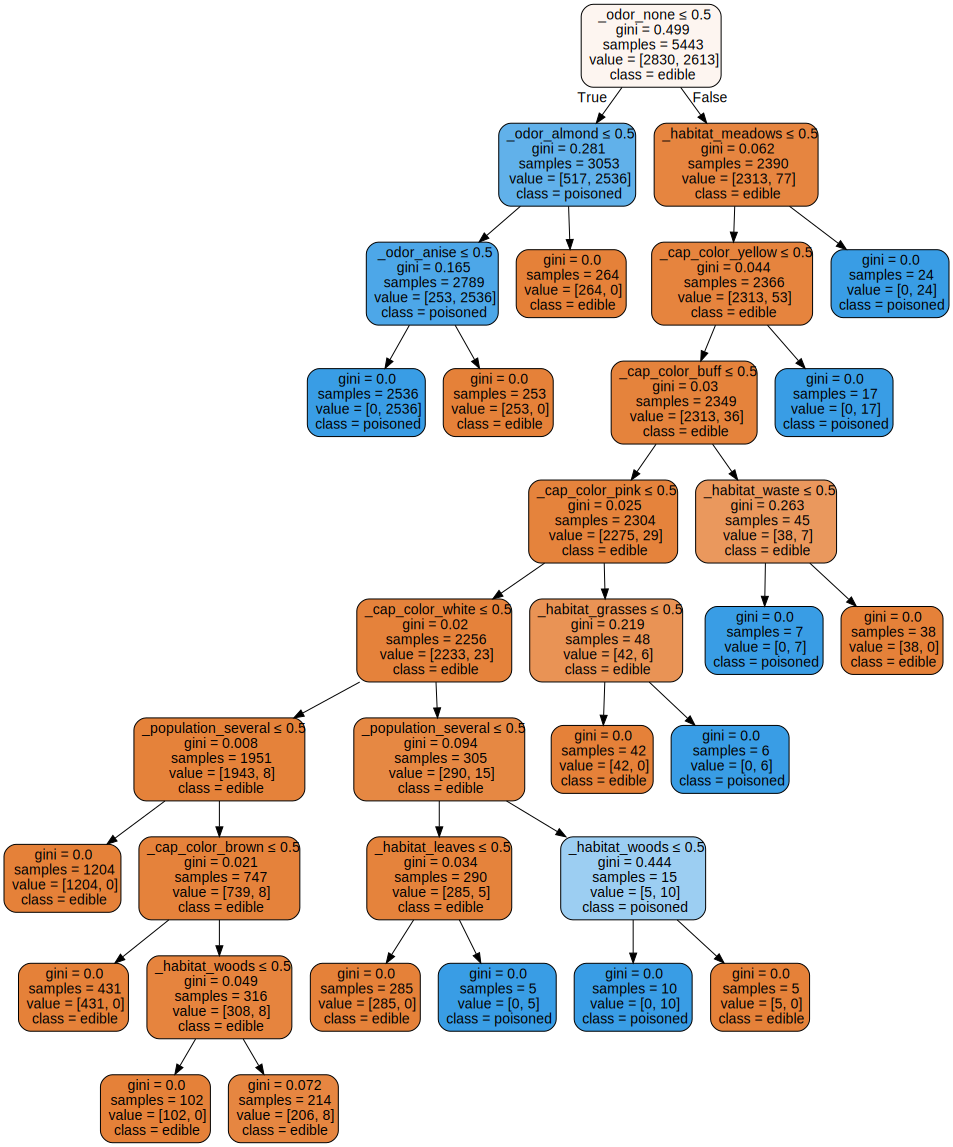

In [303]:
mushroom.tree_vis()

# Analyse de la précision des models selon une CROSS VALIDATION (encoder=OneHotEncoder())

In [198]:
mushroom = Mushroom_ml(df.drop(['_id'], axis=1), '_class')

In [199]:
a = print(mushroom.test_models(show=True))

model : LogisticRegression() => 0.9992947813822285
model : SGDClassifier() => 0.9947992472260043
model : RidgeClassifierCV() => 0.9992947813822285
model : LinearSVC() => 1.0
model : KNeighborsClassifier() => 0.9992947813822285
model : DecisionTreeClassifier() => 0.9992947813822285
model : StackingClassifier(estimators=[('model_1',
                                KNeighborsClassifier(n_neighbors=10)),
                               ('model_2', RidgeClassifierCV())],
                   final_estimator=LogisticRegression()) => 0.9992947813822285
model : AdaBoostClassifier() => 1.0
model : GradientBoostingClassifier() => 0.9992947813822285
model : RandomForestClassifier(n_estimators=10) => 1.0

model : LogisticRegression() => 0.9992947813822285
model : SGDClassifier() => 0.9947992472260043
model : RidgeClassifierCV() => 0.9992947813822285
model : LinearSVC() => 1.0
model : KNeighborsClassifier() => 0.9992947813822285
model : DecisionTreeClassifier() => 0.9992947813822285
model : StackingCl

# FEATURE SELECTION (MODEL:DECISIONTREE, ENCODE:ONEHOT)

# Analyse des features importances

## Features_importances (distance euclidienne) avec RandomForestClassifier et OneHotEncoder()

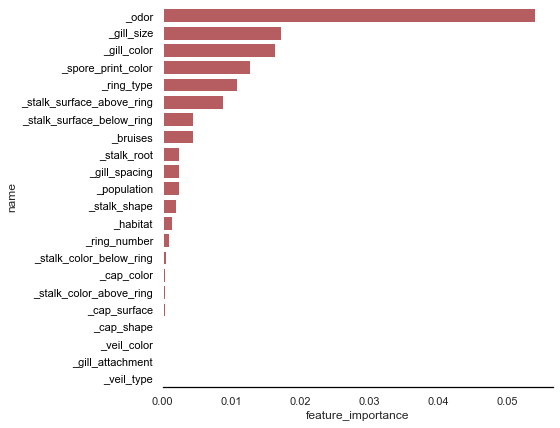

In [200]:
a = mushroom.features_importances()

In [201]:
mushroom.feature_selection(sendmodel=LogisticRegression()).head()

,feature,results
4,_odor,0.973518
6,_gill_spacing,0.913931
19,_spore_print_color,0.892613
17,_ring_number,0.883749
3,_bruises,0.821513


In [37]:
mushroom.feature_selection(['_odor'],sendmodel=LogisticRegression()).head()

,feature,results
18,_spore_print_color,0.989512
11,_stalk_surface_below_ring,0.981894
20,_habitat,0.981617
2,_cap_color,0.979252
13,_stalk_color_below_ring,0.978906


In [39]:
mushroom.feature_selection(['_odor', '_habitat'],sendmodel=LogisticRegression()).head()

,feature,results
18,_spore_print_color,0.995769
2,_cap_color,0.993682
9,_stalk_root,0.991946
3,_bruises,0.991247
10,_stalk_surface_above_ring,0.990205


In [40]:
mushroom.feature_selection(['_odor', '_habitat', '_cap_color'],sendmodel=LogisticRegression()).head()

,feature,results
8,_stalk_root,1.000000
2,_bruises,0.998239
17,_spore_print_color,0.998239
18,_population,0.997182
4,_gill_spacing,0.997182


In [69]:
mushroom=Mushroom_ml(df[['_class','_odor', '_habitat', '_cap_color', '_population']],'_class')

In [71]:
mushroom.test_models([DecisionTreeClassifier()])

'\nmodel : DecisionTreeClassifier() => 0.9971821039229729'

In [70]:
mushroom.grid_model(DecisionTreeClassifier(), {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(1,12),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
})

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score is 0.9971830920431133


{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

accuracy : 0.9970160387914957
precision : 0.9942279942279942
recall : 1.0


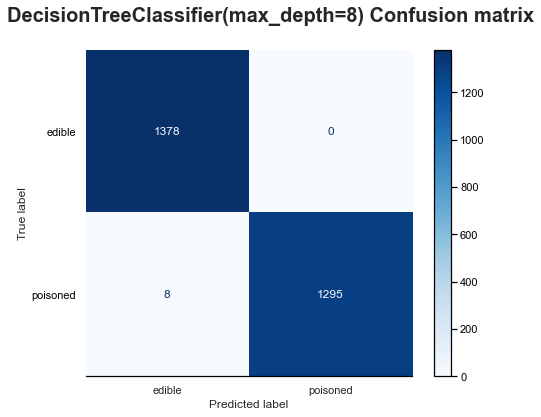

In [73]:
mushroom.score_model(DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=1,min_samples_split=2))

In [ ]:
plot_tree(mushroom.fit_model, feature_names=train_inputs.columns, max_depth=2, filled=True);

In [53]:
mushroom.test_models([LogisticRegression()])

'\nmodel : LogisticRegression() => 0.9860558716977738'

accuracy : 0.9958970533383066
precision : 0.9920806335493161
recall : 1.0


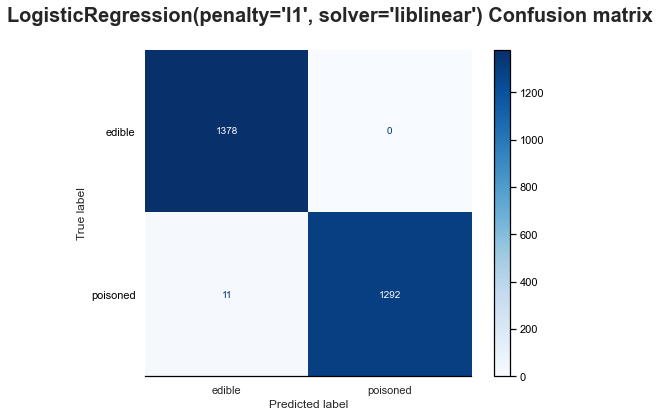

In [54]:
mushroom.score_model(LogisticRegression(C=1.0, penalty='l1', solver='liblinear'))

accuracy : 0.9970160387914957
precision : 0.9942279942279942
recall : 1.0


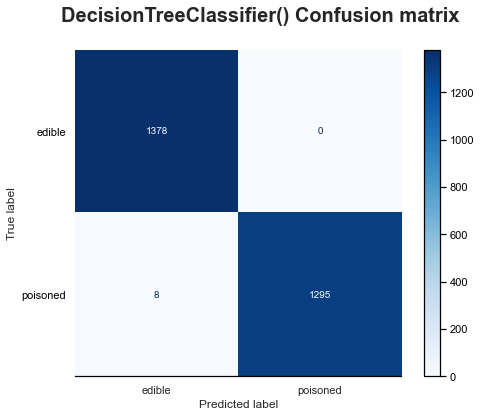

In [55]:
mushroom.score_model(DecisionTreeClassifier())

In [ ]:
mushroom.grid_model()

In [25]:
mushlog = Mushroom_ml(df[['_class', '_odor', '_habitat']],'_class')

In [26]:
mushlog.test_models([LogisticRegression()])

'\nmodel : LogisticRegression() => 0.973517888699717'

In [29]:
mushlog = Mushroom_ml(df[['_class', '_odor', '_habitat', '_cap_color']],'_class')

In [30]:
mushlog.test_models([LogisticRegression(C=1.0, penalty='l1', solver='liblinear')])

"\nmodel : LogisticRegression(penalty='l1', solver='liblinear') => 0.9901998956135049"

accuracy : 0.9929130921298023
precision : 0.9863994273443092
recall : 1.0


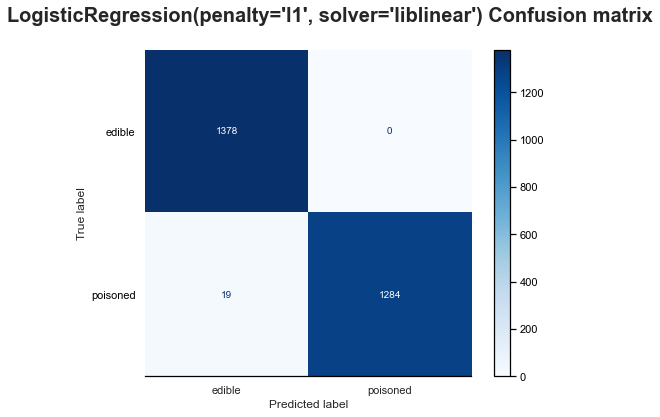

In [31]:
mushlog.score_model(LogisticRegression(C=1.0, penalty='l1', solver='liblinear'))

In [56]:
mushroom.grid_model(DecisionTreeClassifier(), {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(1,12),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
})

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score is 0.9971830920431133


accuracy : 0.9970160387914957
precision : 0.9942279942279942
recall : 1.0


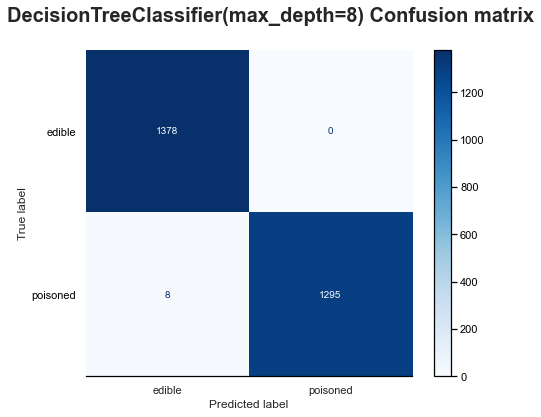

In [57]:
mushroom.score_model(DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=1, min_samples_split=2))

In [63]:
mushroom.grid_model(RandomForestClassifier(), {
    'n_estimators':[0,50,100,150,200,250],
    'criterion':['gini','entropy']
})

Tuned Decision Tree Parameters: {'criterion': 'gini', 'n_estimators': 50}
Best score is 0.9971830920431133


/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 396, in fit
    self._validate_estimator()
  File "/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/ensemb

accuracy : 0.9970160387914957
precision : 0.9942279942279942
recall : 1.0


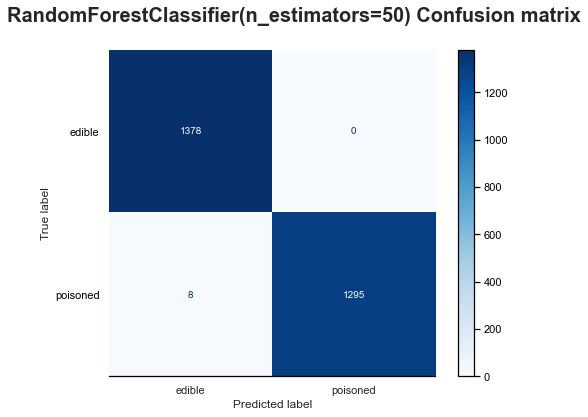

In [64]:
mushroom.score_model(RandomForestClassifier(n_estimators=50, criterion='gini'))

accuracy : 0.9958970533383066
precision : 0.9920806335493161
recall : 1.0


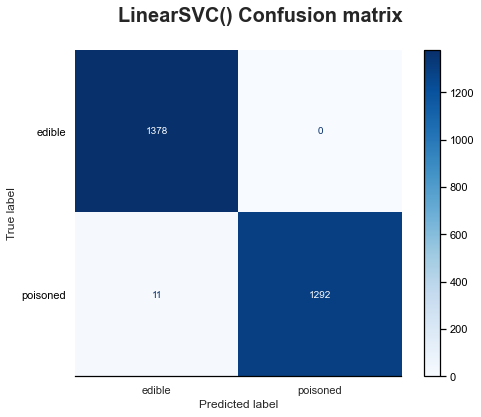

In [65]:
mushroom.score_model(LinearSVC())

In [24]:
mushlog.grid_model(LogisticRegression(), {"C":np.logspace(-3,3,7),"penalty":["l1","l2"],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],})

/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.

/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Tuned Decision Tree Parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best score is 0.9816312851066249


/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baguidou/Desktop/mushrooms/m

accuracy : 0.9884371503170459
precision : 0.9779985805535841
recall : 1.0


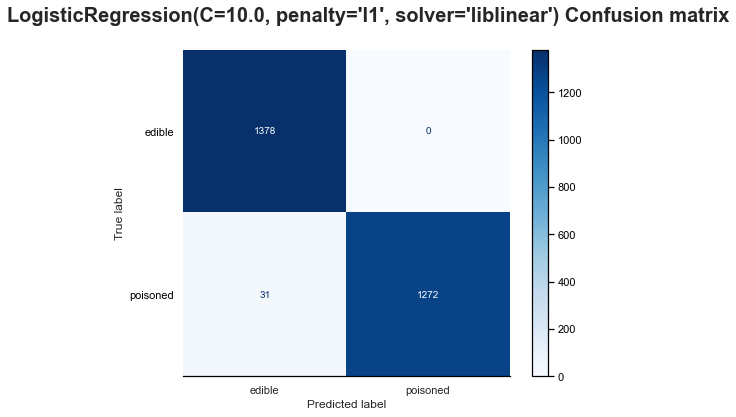

In [21]:
mushlog.score_model(LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))

In [16]:
X_train, X_test, y_train, y_test = mushroom.train_test_split(mushroom.X, mushroom.y)

#define model and encode
model=LogisticRegression()
encoder=OneHotEncoder()

#encode
preprocessing = encoder.fit_transform(X_train)

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"C":np.logspace(-3,3,7), 
              "penalty":["l1","l2"],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }


# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(model, param_dist, cv=5, scoring = 'accuracy')

# Fit it to the data
tree_cv.fit(preprocessing,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

Tuned Decision Tree Parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best score is 1.0


/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baguidou/Desktop/mushrooms/m

In [203]:
mushroom.feature_selection(['_odor', '_habitat', '_cap_color']).head()

,feature,results
8,_stalk_root,1.000000
2,_bruises,0.998239
17,_spore_print_color,0.998239
18,_population,0.997182
4,_gill_spacing,0.997182


In [219]:
mushroom=Mushroom_ml(df[[
    '_class',
    '_odor',
    '_habitat', 
    '_cap_color', 
    '_bruises'    
]],'_class')

accuracy : 0.9559865721745617
precision : 0.9211229946524064
recall : 1.0


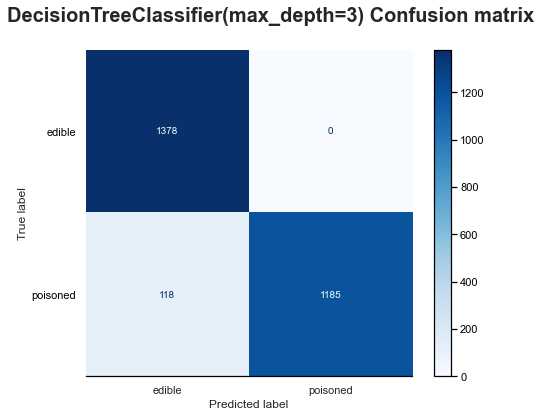

In [220]:
mushroom.score_model(DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2))

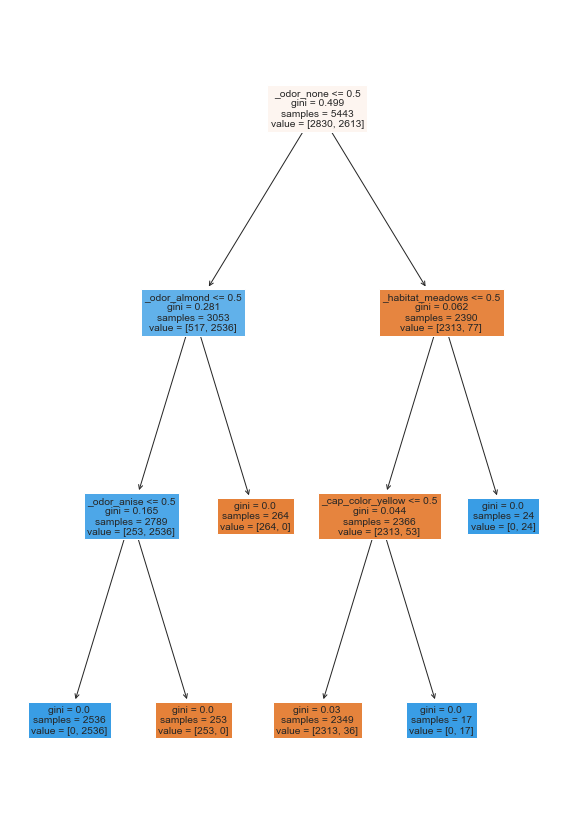

In [102]:
mushroom=Mushroom_ml(
    df[['_class',
        '_odor',
        '_habitat',
        '_cap_color',
        '_population'
    ]],'_class')

#split
X_train, X_test, y_train, y_test = mushroom.train_test_split(mushroom.X, mushroom.y)

#define model and encode
model=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)
encoder = OneHotEncoder()

#encode
preprocessing = encoder.fit_transform(X_train)

#fit
tree_ml = model.fit(preprocessing, y_train)

features_array = list(encoder.get_feature_names_out())

fig, ax = plt.subplots(figsize=(10,15))
plot_tree(tree_ml, feature_names=features_array, filled=True, ax=ax);


In [103]:
mushroom.tree_vis(sendmodel=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2))

AttributeError: 'NoneType' object has no attribute 'splitlines'

In [86]:
print(export_text(tree_ml, feature_names=features_array))

|--- _odor <= 5.50
|   |--- _odor <= 1.50
|   |   |--- class: edible
|   |--- _odor >  1.50
|   |   |--- class: poisoned
|--- _odor >  5.50
|   |--- _odor <= 6.50
|   |   |--- _cap_color <= 8.50
|   |   |   |--- _habitat <= 2.50
|   |   |   |   |--- _habitat <= 1.50
|   |   |   |   |   |--- _cap_color <= 0.50
|   |   |   |   |   |   |--- class: edible
|   |   |   |   |   |--- _cap_color >  0.50
|   |   |   |   |   |   |--- _cap_color <= 1.50
|   |   |   |   |   |   |   |--- class: poisoned
|   |   |   |   |   |   |--- _cap_color >  1.50
|   |   |   |   |   |   |   |--- _cap_color <= 4.00
|   |   |   |   |   |   |   |   |--- class: edible
|   |   |   |   |   |   |   |--- _cap_color >  4.00
|   |   |   |   |   |   |   |   |--- _cap_color <= 6.50
|   |   |   |   |   |   |   |   |   |--- class: poisoned
|   |   |   |   |   |   |   |   |--- _cap_color >  6.50
|   |   |   |   |   |   |   |   |   |--- _habitat <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: edible
|   |   |   |   

In [214]:
mushroom=Mushroom_ml(
    df[['_class',
        '_odor',
        '_habitat'
    ]],
    '_class')

X_train, X_test, y_train, y_test = mushroom.train_test_split(mushroom.X, mushroom.y)

#define model and encode
model=DecisionTreeClassifier()
encoder=OneHotEncoder()

#encode
preprocessing = encoder.fit_transform(X_train)

# Setup the parameters and distributions to sample from: param_dist
param_dist = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(1,12),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}


# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(model, param_dist, cv=5, scoring = 'accuracy')

# Fit it to the data
tree_cv.fit(preprocessing,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score is 0.9902625857505537


accuracy : 0.9951510630361805
precision : 0.9906542056074766
recall : 1.0


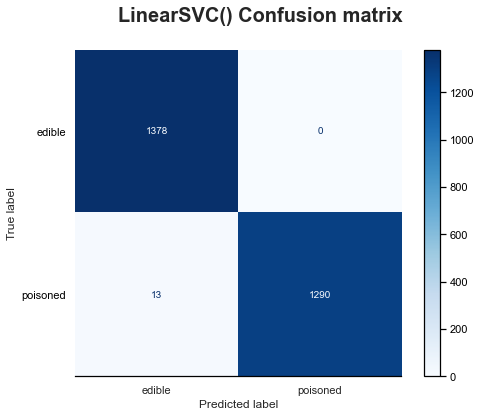

In [125]:
mushroom=Mushroom_ml(
    df[['_class',
        '_odor',
        '_habitat',
        '_cap_color'
    ]],
    '_class')
mushroom.score_model(LinearSVC())

In [63]:
mushroom=Mushroom_ml(
    df[['_class',
        '_odor',
        '_habitat',
        '_cap_color'
        
    ]],
    '_class').test_models()

model : LogisticRegression() => 0.9785710313576482
model : SGDClassifier() => 0.9908967082694204
model : RidgeClassifierCV() => 0.9735406571849318
model : LinearSVC() => 0.9908967082694204
model : KNeighborsClassifier(n_neighbors=10) => 0.9867666695341641
model : DecisionTreeClassifier() => 0.9936829620723409
model : StackingClassifier(estimators=[('model_1',
                                KNeighborsClassifier(n_neighbors=10)),
                               ('model_2', RidgeClassifierCV())],
                   final_estimator=LogisticRegression()) => 0.9884815923929346
model : AdaBoostClassifier() => 0.9919389645148458
model : GradientBoostingClassifier() => 0.9936829620723409
model : RandomForestClassifier(n_estimators=10) => 0.9936829620723409


accuracy : 0.9951510630361805
precision : 0.9906542056074766
recall : 1.0


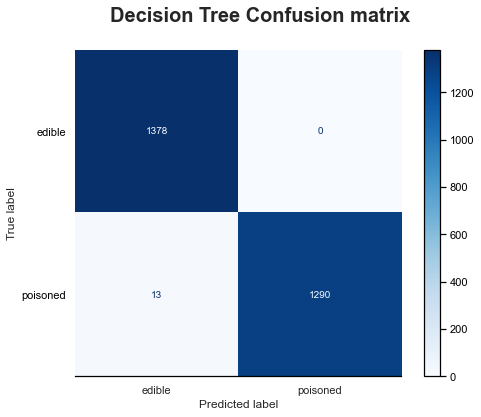

In [50]:
mushroom=Mushroom_ml(
    df[['_class',
        '_odor',
        '_habitat',
        '_cap_color'
    ]],
    '_class').score_model()

In [34]:
mushroom=Mushroom_ml(
    df[['_class',
        '_odor',
        '_habitat',
        '_cap_color'
    ]],'_class')

#split
X_train, X_test, y_train, y_test = mushroom.train_test_split(mushroom.X, mushroom.y)

#define model and encode
model=DecisionTreeClassifier()
encoder = OrdinalEncoder()

#encode
preprocessing = encoder.fit_transform(X_train)

#fit
tree_ml = model.fit(preprocessing, y_train)

features_array = list(encoder.get_feature_names_out())
print(export_text(tree_ml, feature_names=features_array))




|--- _odor <= 5.50
|   |--- _odor <= 1.50
|   |   |--- class: edible
|   |--- _odor >  1.50
|   |   |--- class: poisoned
|--- _odor >  5.50
|   |--- _odor <= 6.50
|   |   |--- _cap_color <= 8.50
|   |   |   |--- _habitat <= 2.50
|   |   |   |   |--- _habitat <= 1.50
|   |   |   |   |   |--- _cap_color <= 4.00
|   |   |   |   |   |   |--- _cap_color <= 0.50
|   |   |   |   |   |   |   |--- class: edible
|   |   |   |   |   |   |--- _cap_color >  0.50
|   |   |   |   |   |   |   |--- _cap_color <= 1.50
|   |   |   |   |   |   |   |   |--- class: poisoned
|   |   |   |   |   |   |   |--- _cap_color >  1.50
|   |   |   |   |   |   |   |   |--- class: edible
|   |   |   |   |   |--- _cap_color >  4.00
|   |   |   |   |   |   |--- _cap_color <= 6.50
|   |   |   |   |   |   |   |--- class: poisoned
|   |   |   |   |   |   |--- _cap_color >  6.50
|   |   |   |   |   |   |   |--- _habitat <= 0.50
|   |   |   |   |   |   |   |   |--- class: edible
|   |   |   |   |   |   |   |--- _habitat >  0.5

accuracy : 0.999627004848937
precision : 1.0
recall : 0.9992743105950653


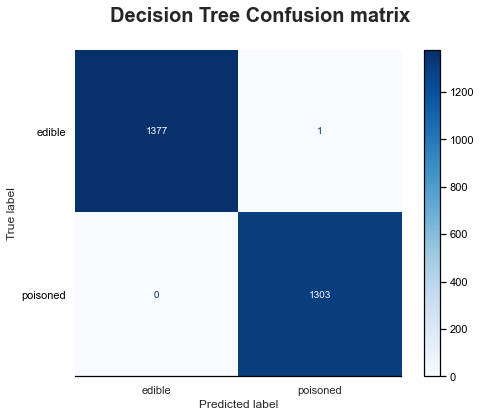

In [10]:
mushroom=Mushroom_ml(
    df[[
        '_habitat',
        '_population',
        '_class', 
        '_gill_color',
        '_odor',
        '_bruises'
    ]],
    '_class').score_model()

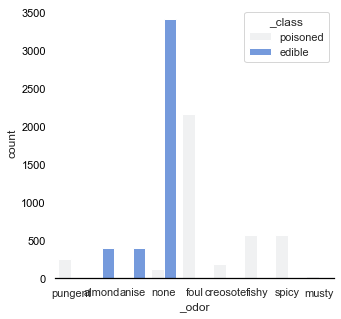

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
plot = sns.countplot(x = df["_odor"], color = 'cornflowerblue', ax=ax, hue=df["_class"], dodge=True)

accuracy : 0.999627004848937
precision : 1.0
recall : 0.9992743105950653


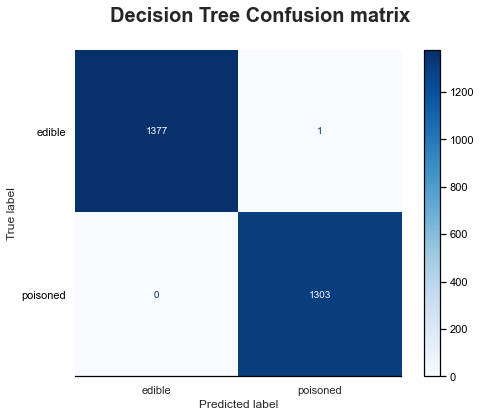

In [69]:
df_test=df[[
    '_class',
    '_odor',
    '_bruises',
    '_habitat',
    '_cap_color'
]]
mushroom = Mushroom_ml(df_test, '_class').score_model(DecisionTreeClassifier())

In [77]:
df_test=df[[
    '_class',
    '_odor',
    '_habitat',
    '_bruises',
    '_cap_color'
]]

mushroom = Mushroom_ml(df_test, '_class')


accuracy : 0.999627004848937
precision : 1.0
recall : 0.9992743105950653


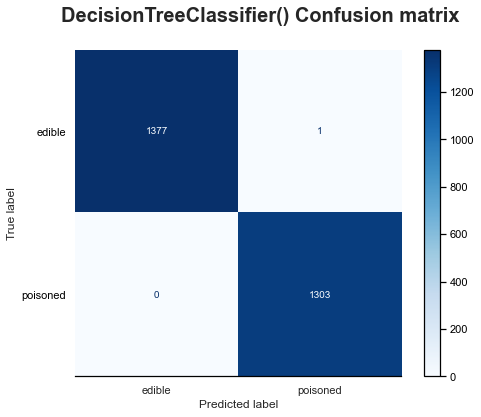

accuracy : 0.999627004848937
precision : 1.0
recall : 0.9992743105950653


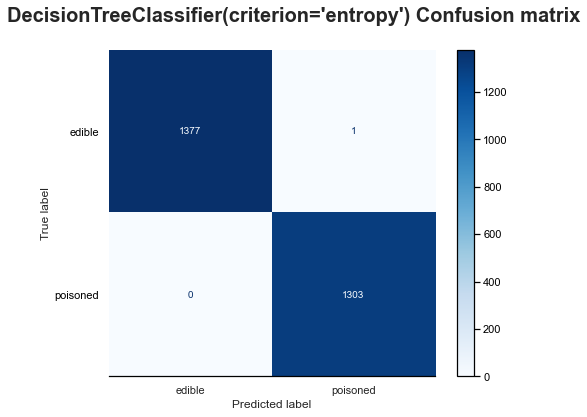

In [84]:
for model in [DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy')]:
    mushroom.score_model(sendmodel = model)

--LogisticRegression()--
accuracy : 0.9858261842596047
precision : 0.9758522727272727
recall : 0.9970972423802612


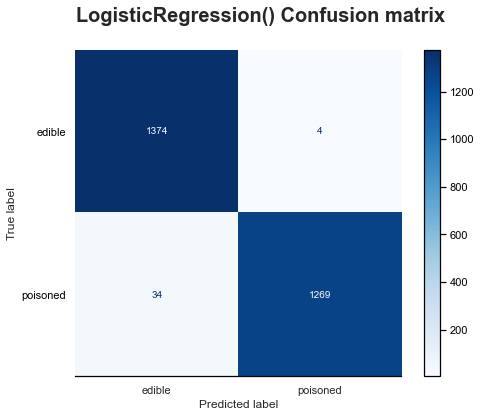

--SGDClassifier()--
accuracy : 0.9947780678851175
precision : 0.9927745664739884
recall : 0.9970972423802612


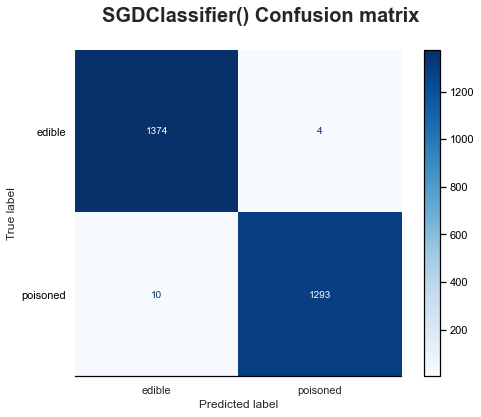

--RidgeClassifierCV()--
accuracy : 0.9839612085042895
precision : 0.9697396199859254
recall : 1.0


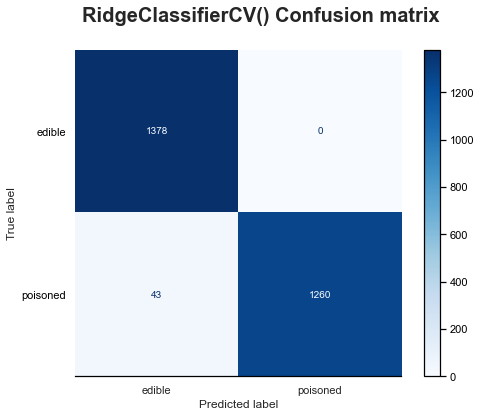

--LinearSVC()--
accuracy : 0.9962700484893696
precision : 0.9927953890489913
recall : 1.0


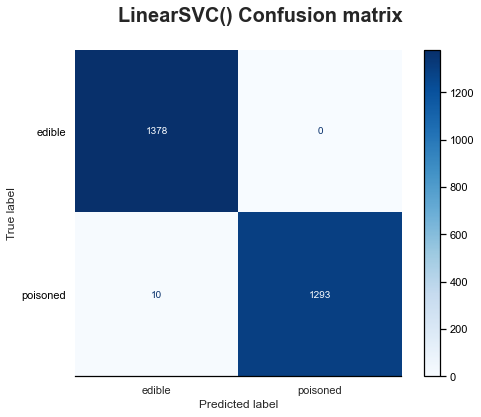

--KNeighborsClassifier(n_neighbors=10)--
accuracy : 0.999627004848937
precision : 1.0
recall : 0.9992743105950653


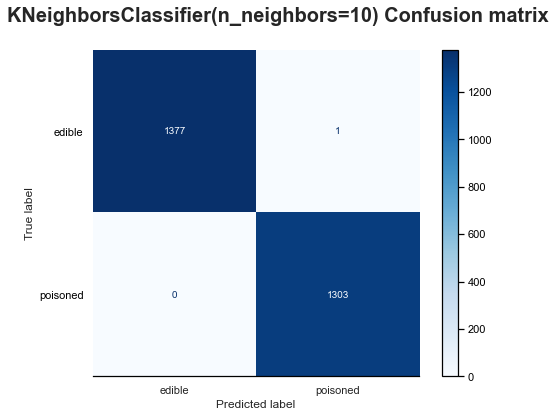

--DecisionTreeClassifier()--
accuracy : 0.999627004848937
precision : 1.0
recall : 0.9992743105950653


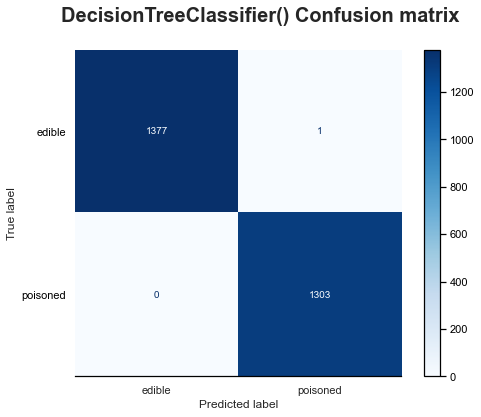

--StackingClassifier(estimators=[('model_1',
                                KNeighborsClassifier(n_neighbors=10)),
                               ('model_2', RidgeClassifierCV())],
                   final_estimator=LogisticRegression())--
accuracy : 0.999627004848937
precision : 1.0
recall : 0.9992743105950653


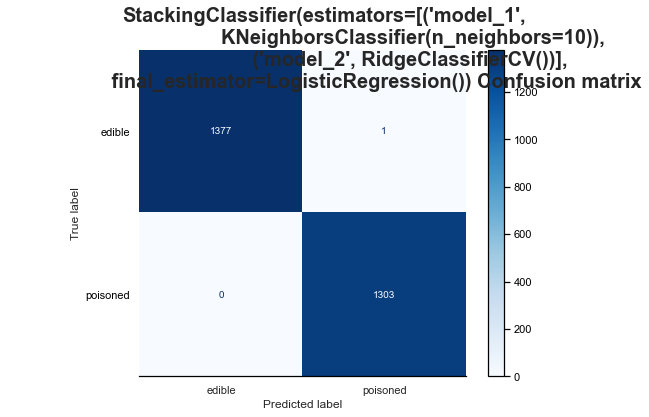

--AdaBoostClassifier()--
accuracy : 0.9951510630361805
precision : 0.9906542056074766
recall : 1.0


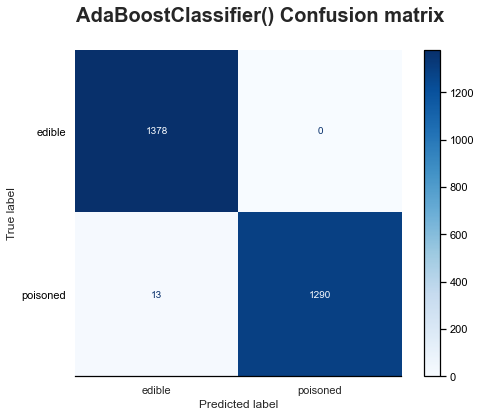

--GradientBoostingClassifier()--
accuracy : 0.9970160387914957
precision : 0.9942279942279942
recall : 1.0


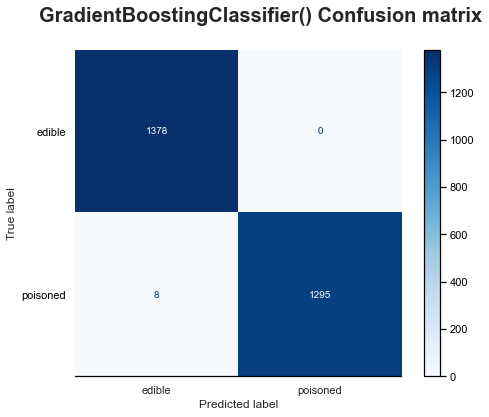

--RandomForestClassifier(n_estimators=10)--
accuracy : 0.999627004848937
precision : 1.0
recall : 0.9992743105950653


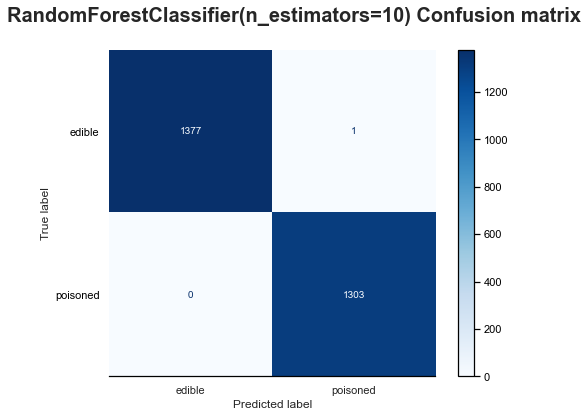

In [78]:
for model in mushroom.list_models:
    print(f'--{model}--')
    A = mushroom.score_model(model)
    

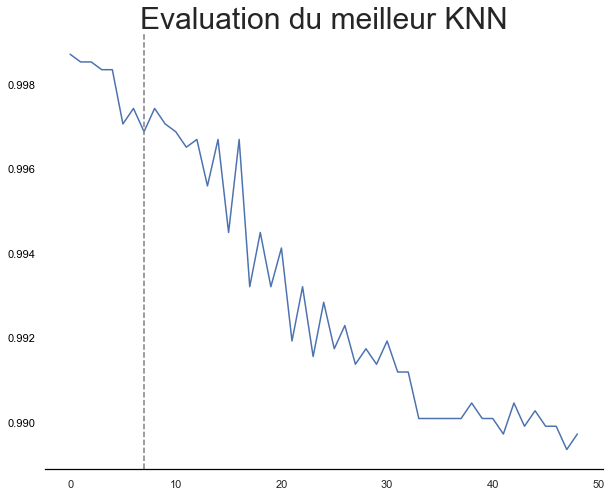

In [14]:
#split
X_train, X_test, y_train, y_test = mushroom.train_test_split(mushroom.X, mushroom.y)

#define model and encode
model=RandomForestClassifier()

#encode
preprocessing = encoder.fit_transform(X_train)


val_score = []
for k in range(1,50):
    val_score.append(cross_val_score(KNeighborsClassifier(k), preprocessing, y_train, cv=5, scoring='accuracy').mean())
    
plt.figure(figsize = (10,8))
plt.title('Evaluation du meilleur KNN', fontsize = 30)
plt.plot(val_score)

#vertical line when x = 7
plt.axvline(x=7,color='gray',linestyle='--')
plt.show()

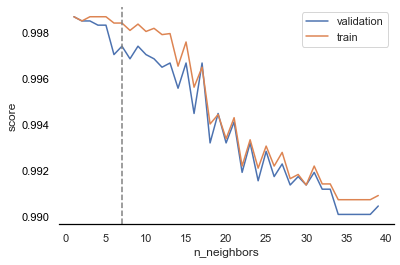

In [15]:
knn_model = KNeighborsClassifier()
k = list(range(1, 40))

train_score, val_score = validation_curve(knn_model, preprocessing, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis = 1), label = 'validation')
plt.plot(k, train_score.mean(axis = 1), label = 'train')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.axvline(x=7,color='gray',linestyle='--')
plt.legend()


In [50]:
#split
X_train, X_test, y_train, y_test = mushroom.train_test_split(mushroom.X, mushroom.y)

#define model and encode
model=DecisionTreeClassifier()

#encode
preprocessing = encoder.fit_transform(X_train)

[ 870 1257 1644 2031 2418 2805 3192 3579 3966 4354]


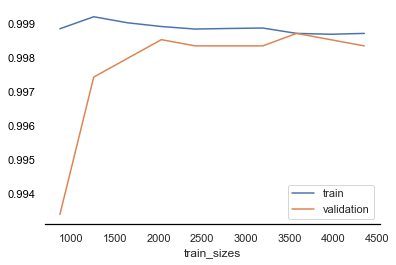

In [51]:
N, train_score, val_score = learning_curve(DecisionTreeClassifier(), preprocessing, y_train, train_sizes = np.linspace(0.2, 1.0, 10),cv = 5)
print(N)

plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis = 1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

In [139]:
def save_model(fit_model, name):
        #---------------------------------------------------------
        """ • Save model fitted
            • Return None"""
        #---------------------------------------------------------
        
        path = os.path.abspath('')
        dump(fit_model, f"{path}/{name}")

def load_model(name):
    #---------------------------------------------------------
    """ • Load model fitted
        • Return Model"""
    #---------------------------------------------------------
    
    path = os.path.abspath('')
    model = load(f"{path}/{name}")
    return model

In [4]:
mushroom=Mushroom_ml(df[[
    '_class',
    '_odor',
    '_habitat',
    '_cap_color',
    '_population'
]],'_class')

In [7]:
sendmodel=DecisionTreeClassifier()
encoder = OneHotEncoder()

model=make_pipeline(encoder, sendmodel)

fit_model=model.fit(mushroom.X, mushroom.y)


In [8]:
fit_model.predict([["pungent","urban","brown","scattered"]])[0]

/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


'poisoned'

In [13]:
save_path = os.path.abspath('')+'/app/models/load_models'+

In [11]:
cursor = conn.cursor()
cursor.execute("""
    INSERT INTO ml(
    name,
    cols,
    model,
    parameters,
    accuracy,
    precision,
    path) 
    VALUES (?,?,?,?,?,?,?)
    """,(
        'Arbre_de_decision_1',
        ('||').join(mushroom.X.columns),
        str(sendmodel),
        json.dumps(fit_model.steps[1][1].get_params()),
        0.99,
        0.99,
        '/models/load_models/Arbre_de_decision_1_fit'
    ))

conn.commit()

In [12]:
pd.read_sql_query("SELECT * from ml", conn)

,id,name,cols,model,parameters,accuracy,precision,path
0,1,Arbre_de_decision_1,_odor||_habitat||_cap_color||_population,DecisionTreeClassifier(),"{""ccp_alpha"": 0.0, ""class_weight"": null, ""crit...",0.99,0.99,/models/load_models/Arbre_de_decision_1_fit


In [15]:
#save model
dump(fit_model, 'app/models/load_models/Arbre_de_decision_1_fit')

['app/models/load_models/Arbre_de_decision_1_fit']

In [17]:
#load model
model_de_test = load('app/models/load_models/Arbre_de_decision_1_fit')

In [18]:
model_de_test.predict([["pungent","urban","brown","scattered"]])

/Users/baguidou/Desktop/mushrooms/mushrooms/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array(['poisoned'], dtype=object)